# **Analysis of a Two Body System's Dynamics Using Numerical Methods**

## **System's Description**

#### **System diagram**

<div style="text-align: center;">
    <img src="system.png" style="max-width: 100%; height: auto;">
</div>

In this system, an object is in motion on the table surface and another object is connect with the object on the table with a string through a hole in the table. This a classical mechanics problem. There is no generalized solution for this system's Lagrangian equation. In this project, the Lagrangian equation of this system is solved by Euler and 4th order Runge Kutta method.

#### **Lagrangian Equation**

$$ (m_1 + m_2)r - m_1 r \dot{e}^2 + m_2 g = 0$$
$$ m_1 r^2 \dot{e} = constant (angular-momentum) = L $$

#### **Euler Equation of This System**

$$\theta_{n+1}=\theta_n+h\frac{L}{m_1r_{n+1}^2}$$
$$r_{n+1}=r_n+hv_n$$
$$v_{r_{n+1}} = v_{r_n}+h(\frac{L^2}{m_1(m_1+m_2)r_n^3}-\frac{m_2g}{m_1+m_2})$$
$$where,n=0,1,2,3,.......$$

#### **4th Order Runge Kutta Equation of This System**

$$\theta_{n+1}=\theta_n+\frac{h}{6}(\frac{L}{m_1r_{n+1}^2}+2\frac{L}{m_1r_{n+1}^2}+2\frac{L}{m_1r_{n+1}^2}+\frac{L}{m_1r_{n+1}^2})$$
$$r_{n+1}=r_n+\frac{1}{6}(k_1+2k_2+k_3+k_4)$$
$$v_{r_{n+1}}=v_{r_{n}}+\frac{1}{6}(l_1+2l_2+2l_3+l_4)$$
where
$$k_1=hv_{r_{n}}$$
$$l_1=h(\frac{L^2}{m_1(m_1+m_2)r_n^3}-\frac{m_2g}{m_1+m_2})$$
$$k_2=h(v_{r_{n}}+\frac{l_1}{2})$$
$$l_2=h(\frac{L^2}{m_1(m_1+m_2)(r_n+\frac{k_1}{2})^3}-\frac{m_2g}{m_1+m_2})$$
$$k_3=h(v_{r_{n}}+\frac{l_2}{2})$$
$$l_3=h(\frac{L^2}{m_1(m_1+m_2)(r_n+\frac{k_2}{2})^3}-\frac{m_2g}{m_1+m_2})$$
$$k_4=h(v_{r_{n}}+l_3)$$
$$l_4=h(\frac{L^2}{m_1(m_1+m_2)(r_n+k_3)^3}-\frac{m_2g}{m_1+m_2})$$
$$n=0,1,2,3,......$$

## **Code**

### Necessary lybraries import section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Input Section

* System's constant variable
    * m1 = mass of the object on the table
    * m2 = mass of the object under the table
    * g = gravitational acceleration (standard value 9.8)
    * L = angular momentum of the object on the table(m1)
    * l = length of string

* Initial condition of the system
    * t0 = 0 (starting or initial time)
    * r0 = initial position of the object on the table (m1)
    * v0 = initial linear velocity of the object on the table (m1)
    * theta0 =  intial angle(in degree) between x-axis and the object on the table (m1)

* Increment value and no of data
    * h = increment value
    * n = no of data

In [2]:
#constant value
m1 = float(input("mass of m1 : "))
m2 = float(input("mass of m2 : "))
g = float(input("gravitational acceleration, g : "))
l = float(input("length of string, l : "))
L = float(input("angular momentum of m1, L : "))

mass of m1 :  5
mass of m2 :  6
gravitational acceleration, g :  9.8
length of string, l :  3
angular momentum of m1, L :  45


In [3]:
#initial condition
r0 = float(input("initial position of m1, r0 : "))
v0 = float(input("initial linear velocity of m1, v0 : "))
theta0 = float(input("initial angle of m1 with x-axis, theta0 : "))
theta0 = math.radians(theta0)

initial position of m1, r0 :  2.5
initial linear velocity of m1, v0 :  0
initial angle of m1 with x-axis, theta0 :  15


In [4]:
#some other input
h = float(input("increment value h : "))
n = int(input("no of data, n : "))

increment value h :  0.1
no of data, n :  200


### Data Creation Section

#### Euler Method

In [5]:
#list
euler_position_list_for_m1 = [r0]
euler_velocity_list_for_m1 = [v0]
euler_position_list_for_m2 = [((-1)*abs(l-r0))]
euler_angular_position_for_m1 = [theta0]
euler_angular_velocity_for_m1 = [L/(m1*(r0**2))]
x_position_for_m1 = [r0*math.cos(theta0)]
y_position_for_m1 = [r0*math.sin(theta0)]

In [6]:
for i in range(1,n):
    if r0<0 or r0>l:
        break
    else:
        r = r0 + h*v0
        v = v0 + h*(((L**2)/(m1*(m1+m2)*(r**3)))-m2*g/(m1+m2))
        s = (-1)*abs(l-r)
        theta = theta0 + h*(L/(m1*(r**2)))
        thetadot = L/(m1*(r**2))
        x = r*math.cos(theta)
        y = r*math.sin(theta)
        thetadot = (L)/(m1*r**2)
        s = (-1)*abs(l-r)
        euler_position_list_for_m1.append(r)
        euler_velocity_list_for_m1.append(v)
        x_position_for_m1.append(x)
        y_position_for_m1.append(y)
        euler_position_list_for_m2.append(s)
        euler_angular_position_for_m1.append(theta)
        euler_angular_velocity_for_m1.append(thetadot)
        r0 = r
        v0 = v
        theta0 = theta

#### 4th Order Runge Kutta Method

In [7]:
#list
r0 = euler_position_list_for_m1[0]
v0 = euler_velocity_list_for_m1[0]
theta0 = euler_angular_position_for_m1[0]
#list
runge_position_list_for_m1 = [r0]
runge_velocity_list_for_m1 = [v0]
runge_position_list_for_m2 = [(-1)*abs(l-r0)]
runge_angular_position_for_m1 = [theta0]
runge_angular_velocity_for_m1 = [L/(m1*(r0**2))]
runge_x_position_for_m1 = [r0*math.cos(theta0)]
runge_y_position_for_m1 = [r0*math.sin(theta0)]

In [8]:
#differential equation
def func(m1,m2,L,l,g,r):
    r_double_dot = ((L**2)/(m1*(m1+m2)*(r**3))) - (m2*g/(m1+m2))
    return r_double_dot
def ang_fuc(L,m1,r):
    ang = L/(m1*(r**2))
    return ang

In [9]:
#solve by 4th order runge kutta method
for i in range(1,n):
    k1 = h * v0
    l1 = h * func(m1,m2,L,l,g,r0)
    k2 = h * (v0 + l1 / 2)
    l2 = h * func(m1,m2,L,l,g,(r0+ k1 / 2))
    k3 = h * (v0 + l2 / 2)
    l3 = h * func(m1,m2,L,l,g,(r0+ k2 / 2))
    k4 = h * (v0 + l3)
    l4 = h * func(m1,m2,L,l,g,(r0+ k3))
    r = r0 + (1/6) * (k1+2*k2+2*k3+k4)
    v = v0 + (1/6) * (l1+2*l2+2*l3+l4)
    s = (-1)*abs(l-r)
    if abs(s)>l or r>l:
        break
    else:        
        theta = theta0 + (h/6)*(ang_fuc(L, m1, r)+2*ang_fuc(L, m1, r)+2*ang_fuc(L, m1, r)+ang_fuc(L, m1, r))
        thetadot = L/(m1*(r**2))
        x = abs(r)*math.cos(theta)
        y = abs(r)*math.sin(theta)
        runge_position_list_for_m1.append(r)
        runge_velocity_list_for_m1.append(v)
        runge_position_list_for_m2.append(s)
        runge_angular_position_for_m1.append(theta)
        runge_angular_velocity_for_m1.append(thetadot)
        runge_x_position_for_m1.append(x)
        runge_y_position_for_m1.append(y)
        r0 = r
        v0 = v
        theta0 = theta

### Visualization

#### Euler Method

##### Positon

In [10]:
# list
time_euler = [x*h for x in range(len(euler_position_list_for_m1))]
x_values = [x*0 for x in range(len(euler_position_list_for_m1))]

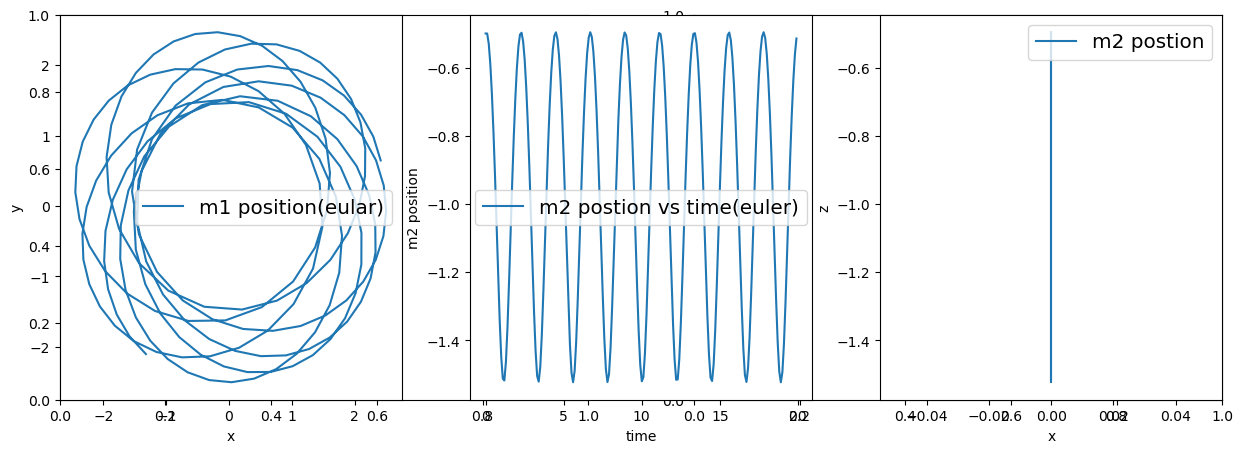

In [11]:
#graph
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(131)
plt.plot(x_position_for_m1, y_position_for_m1, label = "m1 position(eular)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(fontsize="x-large")

plt.subplot(132)
plt.plot(time_euler, euler_position_list_for_m2, label = "m2 postion vs time(euler)" )
plt.xlabel("time")
plt.ylabel("m2 position")
plt.legend(fontsize="x-large", loc="center")

plt.subplot(133)
plt.plot(x_values,euler_position_list_for_m2, label = "m2 postion" )
plt.xlabel("x")
plt.ylabel("z")
plt.legend(fontsize="x-large", loc="upper right")

plt.show()

##### Energy vs Time

In [12]:
E_m1 = []
E_m2 = []
E_total = []

In [13]:
for i in range(len(euler_position_list_for_m1)):
    e_m1 = 0.5*m1*((euler_velocity_list_for_m1[i]**2)+(euler_position_list_for_m1[i]**2)*(euler_angular_velocity_for_m1[i]**2))
    e_m2 = 0.5*m2*(euler_velocity_list_for_m1[i]**2)+m2*g*(euler_position_list_for_m2[i])
    e_tot = e_m1+e_m2
    E_m1.append(e_m1)
    E_m2.append(e_m2)
    E_total.append(e_tot)

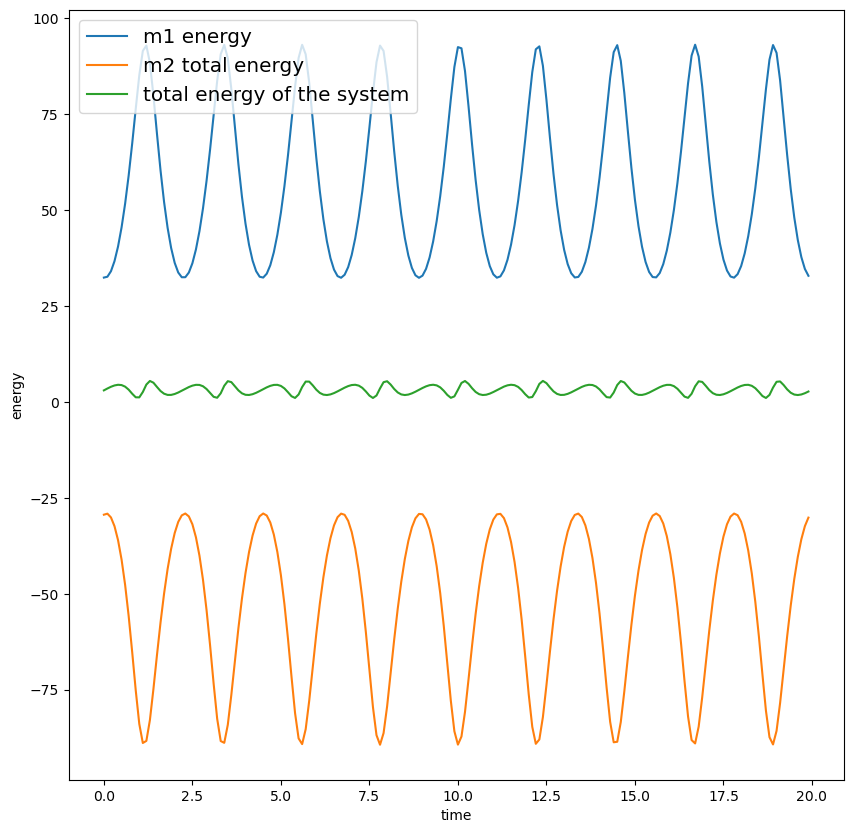

In [14]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(time_euler, E_m1,label="m1 energy" )
ax.plot(time_euler, E_m2,label="m2 total energy" )
ax.plot(time_euler, E_total,label="total energy of the system" )
ax.set_xlabel("time")
ax.set_ylabel("energy")
ax.legend(fontsize="x-large")
plt.show()

#### Runge Kutta Method

##### Position

In [15]:
# list
time_runge = [x*h for x in range(len(runge_position_list_for_m2))]
x_values = [x*0 for x in range(len(runge_position_list_for_m2))]

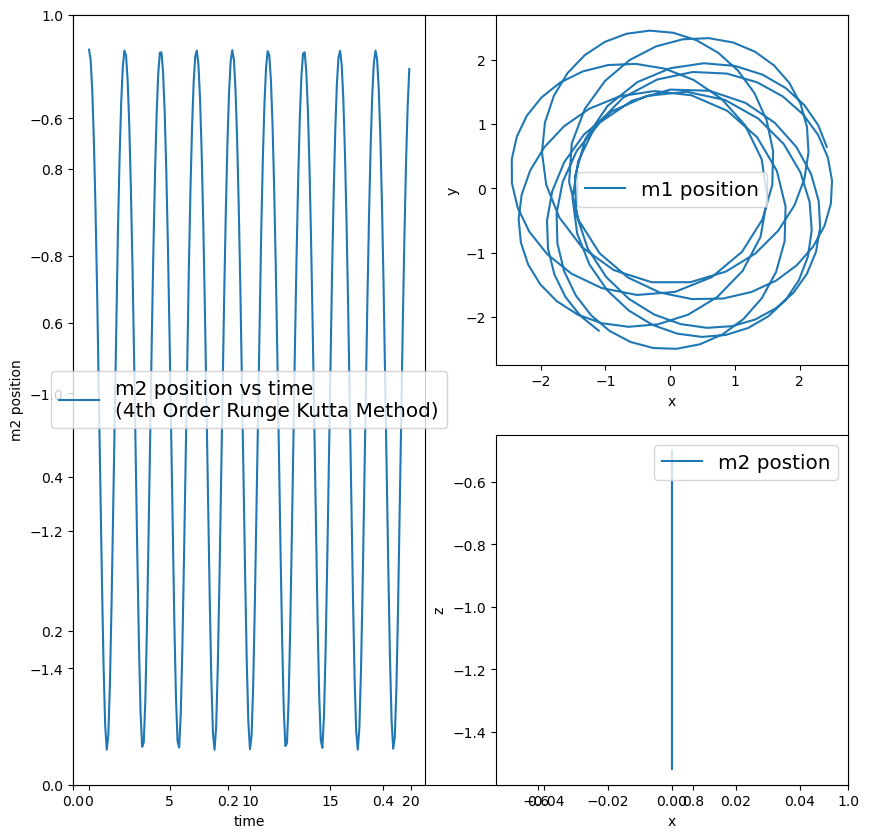

In [16]:
# graph plot
fig, ax = plt.subplots(figsize = (10,10))

ax1 = plt.subplot2grid(shape=(2,2),loc=(0,0),rowspan=2)
ax2 = plt.subplot2grid(shape=(2,2),loc=(0,1))
ax3 = plt.subplot2grid(shape=(2,2),loc=(1,1))

ax1.plot(time_runge, runge_position_list_for_m2, label = "m2 position vs time\n(4th Order Runge Kutta Method)" )
ax1.set_xlabel("time")
ax1.set_ylabel("m2 position")
ax1.legend(fontsize="x-large", loc="center")

ax2.plot(runge_x_position_for_m1, runge_y_position_for_m1, label = "m1 position")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend(fontsize="x-large")

ax3.plot(x_values,runge_position_list_for_m2, label = "m2 postion" )
ax3.set_xlabel("x")
ax3.set_ylabel("z")
ax3.legend(fontsize="x-large", loc="upper right")

plt.show()

##### Energy vs Time

In [17]:
E_m1_runge_list = []
E_k_m2_runge_list = []
E_p_m2_runge_list = []
E_total_m2_runge_list= []
E_total_sys_runge_list = []

In [18]:
time_shape = len(time_runge)
e1_runge_shape = len(E_m1_runge_list)
print(time_shape)
print(e1_runge_shape)

200
0


In [19]:
for i in range(len(runge_position_list_for_m2)):
    E_m1 = (1/2)*m1*(((runge_velocity_list_for_m1[i])**2)+((runge_position_list_for_m1[i]*runge_angular_velocity_for_m1[i])**2))
    E_k_m2 = (1/2)*m2*(((runge_velocity_list_for_m1[i])**2))
    E_p_m2 = m2*g*runge_position_list_for_m2[i]
    E_tot_m2 = E_k_m2 + E_p_m2
    E_tot_sys = E_m1 + E_tot_m2 
    E_m1_runge_list.append(E_m1)
    E_k_m2_runge_list.append(E_k_m2)
    E_p_m2_runge_list.append(E_p_m2)
    E_total_m2_runge_list.append(E_tot_m2)
    E_total_sys_runge_list.append(E_tot_sys)

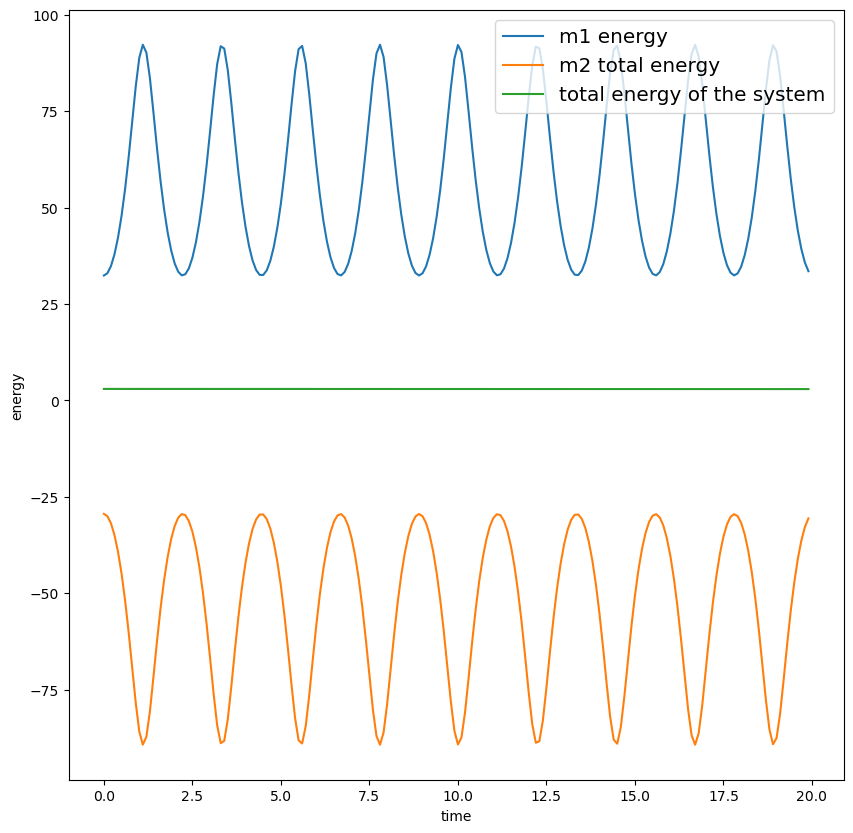

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(time_runge, E_m1_runge_list,label="m1 energy" )
#ax.plot(time, E_k_m2_runge_list,label="m2 kinetic energy" )
#ax.plot(time, E_p_m2_runge_list,label="m2 potential energy" )
ax.plot(time_runge, E_total_m2_runge_list,label="m2 total energy" )
ax.plot(time_runge, E_total_sys_runge_list,label="total energy of the system" )
ax.set_xlabel("time")
ax.set_ylabel("energy")
ax.legend(fontsize="x-large")
plt.show()

#### Comparison between Euler and Runge Kutta Method

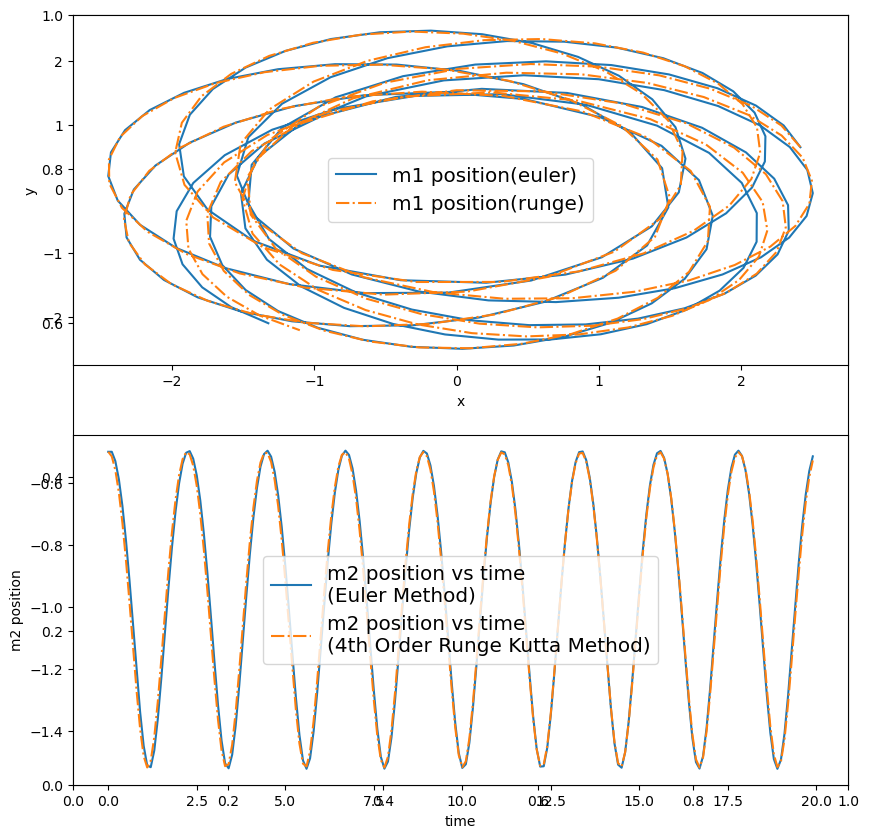

In [22]:
fig, ax = plt.subplots(figsize = (10,10))

ax1 = plt.subplot2grid(shape=(2,1),loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,1),loc=(1,0))

ax1.plot(x_position_for_m1, y_position_for_m1, label = "m1 position(euler)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend(fontsize="x-large")

ax1.plot(runge_x_position_for_m1, runge_y_position_for_m1, '-.', label = "m1 position(runge)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend(fontsize="x-large")

ax2.plot(time_euler, euler_position_list_for_m2, label = "m2 position vs time\n(Euler Method)" )
ax2.set_xlabel("time")
ax2.set_ylabel("m2 position")
ax2.legend(fontsize="x-large", loc="center")

ax2.plot(time_runge, runge_position_list_for_m2, '-.', label = "m2 position vs time\n(4th Order Runge Kutta Method)" )
ax2.set_xlabel("time")
ax2.set_ylabel("m2 position")
ax2.legend(fontsize="x-large", loc="center")